## Introduction of the Data:
#### The dataset contains information about 3,000 movies from IMDb. It includes various attributes like movie IDs, budget, genres, revenue, cast, crew, and more. Key columns include:

* Movie metadata: id, imdb_id, title, genres, original_language, overview, release_date, etc.
* Financial information: budget, revenue.
* Production: production_companies, production_countries, crew.
* Cast and crew details: cast, crew.
* Popularity and ratings: popularity, status, runtime, tagline, etc.

## Business Problem:
Maximizing box office revenue: We aim to understand factors that influence the financial success of a movie. By analyzing features like budget, cast, genres, and production details, we could generate insights to guide production choices for profitable outcomes.

Let's start

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data = pd.read_csv('/content/drive/MyDrive/A_B_Data_Science/imdb_data.csv')
data

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'n

### Insights
* it look's our data have missing values
* we should also need to know the +ve and -ve profit erned by movies.

## Do some besic checks
* Shape ,columns , index
* info , dtypes(numerical , catagrical), describe(numerical , catagrical).
* missing values , duplicate **values**

In [5]:
data.shape    # have 3k movies data with there 23 inforation

(3000, 23)

In [6]:
data.index

RangeIndex(start=0, stop=3000, step=1)

In [7]:
data.info()         # Memory used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

### Numerical Columns

In [8]:
data.select_dtypes(include=['float64','int64'])

,id,budget,popularity,runtime,revenue
0,1,14000000,6.575393,93.0,12314651
1,2,40000000,8.248895,113.0,95149435
2,3,3300000,64.299990,105.0,13092000
3,4,1200000,3.174936,122.0,16000000
4,5,0,1.148070,118.0,3923970
...,...,...,...,...,...
2995,2996,0,9.853270,102.0,1596687
2996,2997,0,3.727996,102.0,180590
2997,2998,65000000,14.482345,120.0,89456761
2998,2999,42000000,15.725542,90.0,171963386



### Insights:
* Create some date time column

### Catagerical columns

In [9]:
data.select_dtypes(include=['object'])

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,"[{'id': 107674, 'name': 'The Princess Diaries ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,NaN,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de..."
2996,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '571

### Statistical of Numerical

In [10]:
data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


### Statistical of catagerical columns

In [11]:
data.describe(include='object')

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
count,604,2993,946,3000,3000,3000,2992,2999,2844,2945,3000,2980,3000,2403,3000,2724,2987,2984
unique,422,872,941,3000,36,2975,2992,2999,2383,321,2398,401,2,2400,2969,2648,2975,2984
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2637294,en,Joshua,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
freq,16,266,4,1,2575,2,1,1,51,1752,5,1817,2996,3,2,27,13,1


### . Check duplicated and Null values

In [12]:
data.duplicated().sum()

0

In [13]:
data.isnull().sum()

,0
id,0
belongs_to_collection,2396
budget,0
genres,7
homepage,2054
imdb_id,0
original_language,0
original_title,0
overview,8
popularity,0


### Let's handel the missing values
* First know the skew of missing columns
* Firstly prefer domain knowladge to replce missing values.
* We will drop that columns w/h values have null values more then or near to 80%.
* Catatagrical null values will replaced by mode.
* numerical null values replaced by mean or median


### %age of null values w.r.t all cells of particular column

In [14]:
(data.isnull().sum()/len(data)*100).reset_index()

,index,0
0,id,0.000000
1,belongs_to_collection,79.866667
2,budget,0.000000
3,genres,0.233333
4,homepage,68.466667
5,imdb_id,0.000000
6,original_language,0.000000
7,original_title,0.000000
8,overview,0.266667
9,popularity,0.000000


## Data Cleaning

###I) ('belongs_to_collection','homepage','poster_path','tagline','Keywords','overview)' have Na values around ~80% or some columns are not usefull so we are droping these columns

In [15]:
data.drop(columns=['belongs_to_collection','homepage','poster_path','tagline','Keywords','overview'] , axis = 1 , inplace = True)

### II)Catagirical columns

* Genres

In [16]:
data['genres'].mode()

,genres
0,"[{'id': 18, 'name': 'Drama'}]"


In [17]:
data['genres'].fillna(value="[{'id': 18, 'name': 'Drama'}]", inplace = True )

<ipython-input-17-f0c94822d370>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['genres'].fillna(value="[{'id': 18, 'name': 'Drama'}]", inplace = True )


* Spoken_language

In [18]:
data['spoken_languages'].mode()

,spoken_languages
0,"[{'iso_639_1': 'en', 'name': 'English'}]"


In [19]:
data['spoken_languages'] = data['spoken_languages'].fillna(value="[{'iso_639_1': 'en', 'name': 'English'}]")

* Production_companies

In [20]:
data['production_companies'].mode()

,production_companies
0,"[{'name': 'Paramount Pictures', 'id': 4}]"


In [21]:
data['production_companies'] = data['production_companies'].fillna(value="[{'id': 3, 'name': 'Columbia Pictures'}]")

* Production_countries

In [22]:
data['production_countries'].mode()

,production_countries
0,"[{'iso_3166_1': 'US', 'name': 'United States o..."


In [23]:
data['production_countries'] = data['production_countries'].fillna(value="[{'iso_3166_1': 'US', 'name': 'United States o...'}]")

### III)Check the skew of Runtime
* Data is +ve skewed

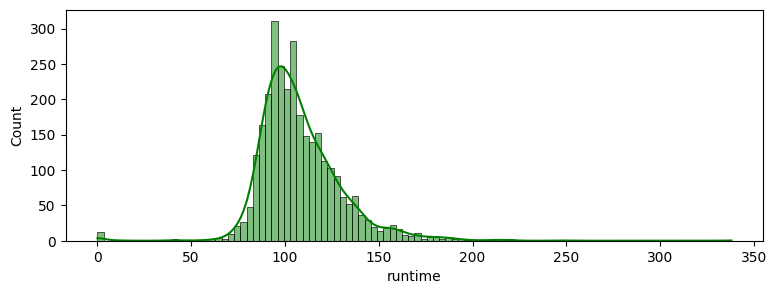

In [24]:
plt.figure(figsize =(9,3))
sns.histplot(x=data['runtime'],kde = True, color = 'green')
plt.show()

In [25]:
data['runtime'].skew()

1.0176189294783144

In [26]:
data['runtime'].median()

104.0

In [27]:
data['runtime'] =data['runtime'].fillna(value=data['runtime'].median())

### IV)Domain knowladge

In [28]:
data['cast'] = data['cast'].fillna(value="no cast")

In [29]:
data['crew'] = data['crew'].fillna(value="no crew")

# Ckeck null_values

In [30]:
data.isnull().sum()

,0
id,0
budget,0
genres,0
imdb_id,0
original_language,0
original_title,0
popularity,0
production_companies,0
production_countries,0
release_date,0


## Feature Engineering
* Change lengthy column name with sort name , can also do on unique values.
* Devlop question in your minds related to your data to drive to build new ideas.
* Create  new columns
*

In [31]:
data.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'title', 'cast', 'crew', 'revenue'],
      dtype='object')

In [32]:
data.rename({'original_language':'orig_lang','original_title':'orig_title','production_companies':'prod_comp',
             'production_countries':'prod_count','spoken_languages':'spoken_lang','taglinne':'tagline'} , axis = 1 , inplace = True)
data.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'orig_lang', 'orig_title',
       'popularity', 'prod_comp', 'prod_count', 'release_date', 'runtime',
       'spoken_lang', 'status', 'title', 'cast', 'crew', 'revenue'],
      dtype='object')

### Create column
#### Profit column

In [33]:
data['Profit'] = data['revenue'] - data['budget']

#### Year column

In [34]:

data['release_date'] = pd.to_datetime(data['release_date'], errors = 'coerce')
data['release_month'] = data['release_date'].dt.month_name()
data['year'] = data['release_date'].dt.year

<ipython-input-34-31a0eb77a94b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['release_date'] = pd.to_datetime(data['release_date'], errors = 'coerce')


#### genres_list

In [35]:
import ast


# Function to extract genres
def extract_genres(df):
    # Extract genre names from the 'genres' column
    df['genres_list'] = data['genres'].apply(lambda x: [g['name'] for g in ast.literal_eval(x)] if pd.notna(x) else [])
    return df

# Apply the function to create a new column with the extracted genres
data_with_genres = extract_genres(data)

# Display the first few rows of the dataset with the new 'genres_list' column
data_with_genres[['title', 'genres']].head()

,title,genres
0,Hot Tub Time Machine 2,"[{'id': 35, 'name': 'Comedy'}]"
1,The Princess Diaries 2: Royal Engagement,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,Whiplash,"[{'id': 18, 'name': 'Drama'}]"
3,Kahaani,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
4,Marine Boy,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."


####  Create column of loss and profit revenue.

In [36]:
# Convert 'Profit' to numeric, invalid parsing will be set as NaN
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')

# Apply the labeling function, adding 'Neutral' for 0 profit
data['Profit_Label'] = data['Profit'].apply(lambda x: 'Positive' if x > 0 else ('Negaive' if x < 0 else 'Neutral'))

### New columns

In [37]:
data.sort_values('Profit', ascending=True, inplace=True)
data.reset_index(drop=True, inplace=True)

In [38]:
data.loc[:,['id' ,'genres_list','budget', 'revenue', 'Profit','Profit_Label', 'release_month' , 'year']]

,id,genres_list,budget,revenue,Profit,Profit_Label,release_month,year
0,2624,"[Adventure, Science Fiction, Action]",197471676,90024292,-107447384,Negaive,July,2017
1,2279,"[Action, Comedy, Science Fiction]",100000000,7103973,-92896027,Negaive,August,2002
2,252,"[Action, Adventure]",98000000,10017322,-87982678,Negaive,December,1995
3,308,"[Crime, Drama]",108000000,22678555,-85321445,Negaive,December,2016
4,777,[Drama],130000000,49554002,-80445998,Negaive,November,2008
...,...,...,...,...,...,...,...,...
2995,2323,"[Action, Science Fiction, Adventure]",195000000,1123746996,928746996,Positive,June,2011
2996,685,"[Family, Fantasy, Romance]",160000000,1262886337,1102886337,Positive,March,2017
2997,2771,"[Action, Adventure, Science Fiction]",280000000,1405403694,1125403694,Positive,April,2015
2998,1127,"[Science Fiction, Action, Adventure]",220000000,1519557910,1299557910,Positive,April,2012


### Data filtring and Groupby

In [39]:
data.loc[:, 'status'].value_counts()           #  Unique values of Status

,count
status,
Released,2996
Rumored,4


#### Status plot

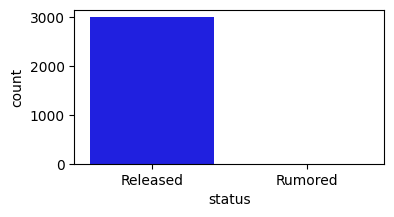

In [40]:
plt.figure(figsize= (4,2))
sns.countplot(x=data['status'] , color = 'blue')
plt.show()

In [41]:
# how many movies relesed in hindi and english after 2000
movies = data[(data['orig_lang'] == 'hi') | (data['orig_lang'] == 'en') & (data['year'] >= 2000)].shape
print('Movies relesed in hindi and english after 2000: ',movies[0])

Movies relesed in hindi and english after 2000:  1703


In [42]:
# how many movies relesed in hindi
movie = data[(data['orig_lang'] == 'hi') | (data['orig_lang'] == 'en')].shape
print('Movies relesed in Hindi: ',movie[0])

Movies relesed in Hindi:  2617


In [43]:
# how many hindi movies relesed after 2000 and they genrate +ve profit ?
Hindi_movie = data[(data['orig_lang'] == 'hi') & (data['year'] > 2000) & (data['Profit'] > 0)].shape
print('Hindies movies relesed after 2000 with + profit:',Hindi_movie[0])

Hindies movies relesed after 2000 with + profit: 32


In [44]:
# how many movies have genrate -ve profit before 2000
Neg_movies = data[(data['Profit'] < 0) & (data['year'] < 2000)].shape
print('Movies are with negetive profit:',Neg_movies[0])

Movies are with negetive profit: 188


### II)Groupby : create statistical question : mean , median , sum , count , min , max , std()
* catagerical column :
* numerical column :
* aggregate fuction :



In [45]:
data.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'orig_lang', 'orig_title',
       'popularity', 'prod_comp', 'prod_count', 'release_date', 'runtime',
       'spoken_lang', 'status', 'title', 'cast', 'crew', 'revenue', 'Profit',
       'release_month', 'year', 'genres_list', 'Profit_Label'],
      dtype='object')

In [46]:
# how much max revenue gentated by each language movies
data.groupby('orig_lang')['revenue'].max().reset_index().sort_values('revenue')

,orig_lang,revenue
28,sr,198
3,cs,17393
14,hu,282358
1,bn,536364
34,vi,639000
33,ur,645135
26,ro,1185783
0,ar,1347747
23,no,1984662
9,fa,2402067


In [47]:
# how many movies released in each month
data.groupby('release_month')['id'].count().reset_index()

,release_month,id
0,April,245
1,August,256
2,December,263
3,February,226
4,January,212
5,July,209
6,June,237
7,March,238
8,May,224
9,November,221


In [48]:
# find total profit in each year and max revenue in year
data.groupby('year').agg({'Profit':'sum' , 'revenue':'max'})

,Profit,revenue
year,,
1974,282901369,119500000
1975,709643036,470654000
1976,463383656,161000000
1977,517939651,185438673
1978,341338754,141000000
...,...,...
2069,114653308,102308889
2070,199440872,136400000
2071,258245404,116019547


### Unique_values of specific column

In [49]:
data['orig_lang'].value_counts()

,count
orig_lang,
en,2575
fr,78
ru,47
es,43
hi,42
ja,37
it,24
cn,20
ko,20


In [50]:
data.head(5)

,id,budget,genres,imdb_id,orig_lang,orig_title,popularity,prod_comp,prod_count,release_date,runtime,spoken_lang,status,title,cast,crew,revenue,Profit,release_month,year,genres_list,Profit_Label
0,2624,197471676,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",tt2239822,en,Valerian and the City of a Thousand Planets,15.262706,"[{'name': 'EuropaCorp', 'id': 6896}]","[{'iso_3166_1': 'FR', 'name': 'France'}]",2017-07-20,137.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Valerian and the City of a Thousand Planets,no cast,no crew,90024292,-107447384,July,2017,"[Adventure, Science Fiction, Action]",Negaive
1,2279,100000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0180052,en,The Adventures of Pluto Nash,8.903754,"[{'name': 'Village Roadshow Pictures', 'id': 7...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2002-08-15,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Adventures of Pluto Nash,"[{'cast_id': 10, 'character': 'Pluto Nash', 'c...","[{'credit_id': '52fe447a9251416c750362df', 'de...",7103973,-92896027,August,2002,"[Action, Comedy, Science Fiction]",Negaive
2,252,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0112760,en,Cutthroat Island,7.284477,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Cutthroat Island,"[{'cast_id': 1, 'character': 'Morgan Adams', '...","[{'credit_id': '52fe42f4c3a36847f802f69f', 'de...",10017322,-87982678,December,1995,"[Action, Adventure]",Negaive
3,308,108000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",tt2361317,en,Live by Night,19.943930,"[{'name': 'Appian Way', 'id': 562}, {'name': '...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-12-25,129.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live by Night,"[{'cast_id': 0, 'character': 'Joe Coughlin', '...","[{'credit_id': '5327f970c3a3683179001eb4', 'de...",22678555,-85321445,December,2016,"[Crime, Drama]",Negaive
4,777,130000000,"[{'id': 18, 'name': 'Drama'}]",tt0455824,en,Australia,9.566135,"[{'name': 'Bazmark Films', 'id': 240}, {'name'...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2008-11-18,165.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Australia,"[{'cast_id': 3, 'character': 'Lady Sarah Ashle...","[{'credit_id': '52fe446cc3a36847f809546f', 'de...",49554002,-80445998,November,2008,[Drama],Negaive


In [51]:
data.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'orig_lang', 'orig_title',
       'popularity', 'prod_comp', 'prod_count', 'release_date', 'runtime',
       'spoken_lang', 'status', 'title', 'cast', 'crew', 'revenue', 'Profit',
       'release_month', 'year', 'genres_list', 'Profit_Label'],
      dtype='object')

# Create visualization


## I) Distribution of Release_month

<ipython-input-52-cbaaf52a3163>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['release_month'] , palette= 'husl')


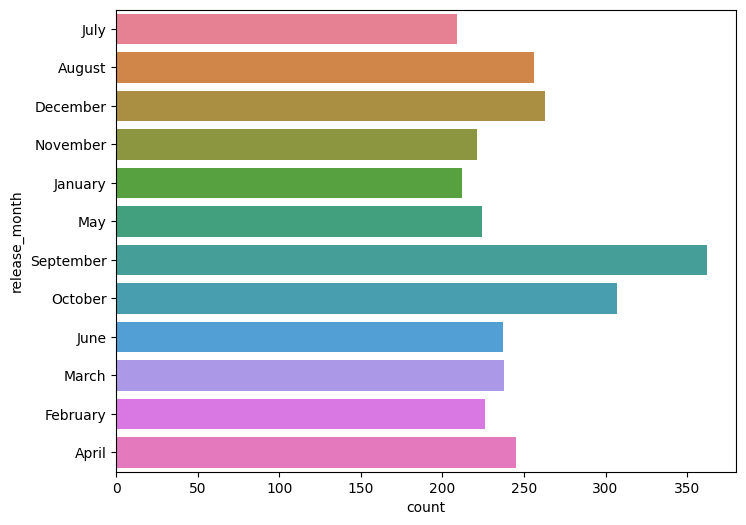

In [52]:

y=data['release_month']
plt.figure(figsize=(8,6))
sns.countplot(y=data['release_month'] , palette= 'husl')
plt.show()

* Insights: Higest movies relesed in September month. , minimum in July.

## II)Distribution of Runtime

<ipython-input-53-caf16e470875>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data['runtime'] , kde=True ,palette='tab10' )


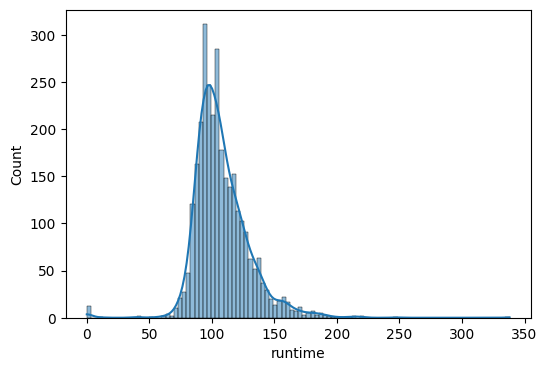

In [53]:
x=data['runtime']
plt.figure(figsize=(6,4))
sns.histplot(x=data['runtime'] , kde=True ,palette='tab10' )
plt.show()

* Insights: Runtime is slightly right skewed

### III) Distribution of Popularity

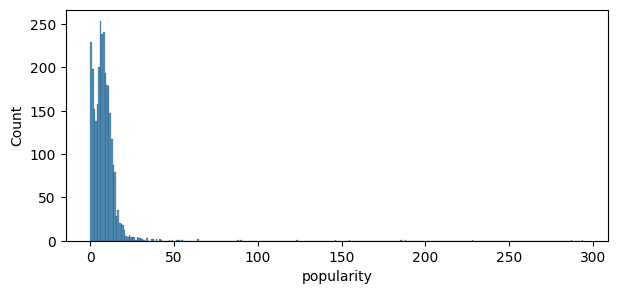

In [54]:
x=data['popularity']
plt.figure(figsize=(7,3))
sns.histplot(x=data['popularity'])
plt.show()

* Insights: There is outliers on right hand side.

In [55]:
# Sorting the dataset based on popularity to get the most popular movies
top_popular_movies = data[['title', 'popularity', 'budget', 'revenue', 'release_date']].sort_values(by='popularity', ascending=False).head(10)

top_popular_movies


,title,popularity,budget,revenue,release_date
2977,Wonder Woman,294.337037,149000000,820580447,2017-05-30
2996,Beauty and the Beast,287.253654,160000000,1262886337,2017-03-16
2811,Baby Driver,228.032744,34000000,224511319,2017-06-28
2981,Deadpool,187.860492,58000000,783112979,2016-02-09
2975,Guardians of the Galaxy Vol. 2,185.330992,200000000,863416141,2017-04-19
2912,Gone Girl,154.801009,61000000,369330363,2014-10-01
2835,War for the Planet of the Apes,146.161786,152000000,369907963,2017-07-11
2988,The Dark Knight,123.167259,185000000,1004558444,2008-07-16
2998,The Avengers,89.887648,220000000,1519557910,2012-04-25
1263,The Circle,88.439243,18000000,20497844,2017-04-27


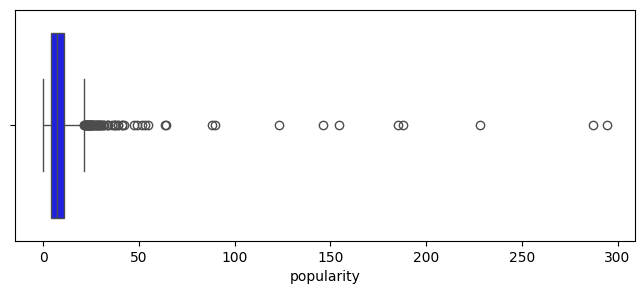

In [56]:
# orig_lang histplot
plt.figure(figsize=(8,3))
sns.boxplot(x=data['popularity'] , color='blue')
plt.show()

#### Statistical analysis of popularity

In [57]:
# Calculate Q1 (25th percentile), Q2 (50th percentile or median), Q3 (75th percentile) of Popularity
Q1 = np.percentile(data['popularity'], 25)
Q2 = np.percentile(data['popularity'], 50)  # or np.median(data)
Q3 = np.percentile(data['popularity'], 75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Output the results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (50th percentile, median): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")

Q1 (25th percentile): 4.018052750000001
Q2 (50th percentile, median): 7.3748615
Q3 (75th percentile): 10.890983
IQR (Interquartile Range): 6.87293025


### Numbers of columns

In [58]:
Numbers_of_columns = len(data.columns)
Numbers_of_columns

22

### IV) what is the effect of Budget on Revenue.

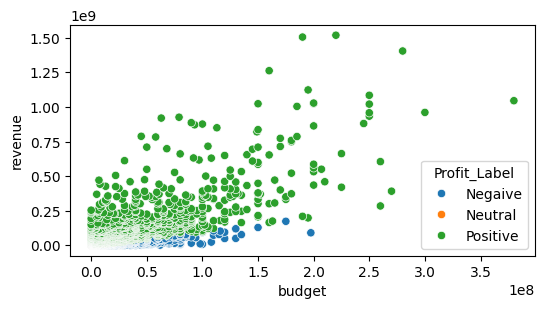

In [59]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=data , x = 'budget' , y = 'revenue' , color = 'blue' , hue = 'Profit_Label')
plt.show()

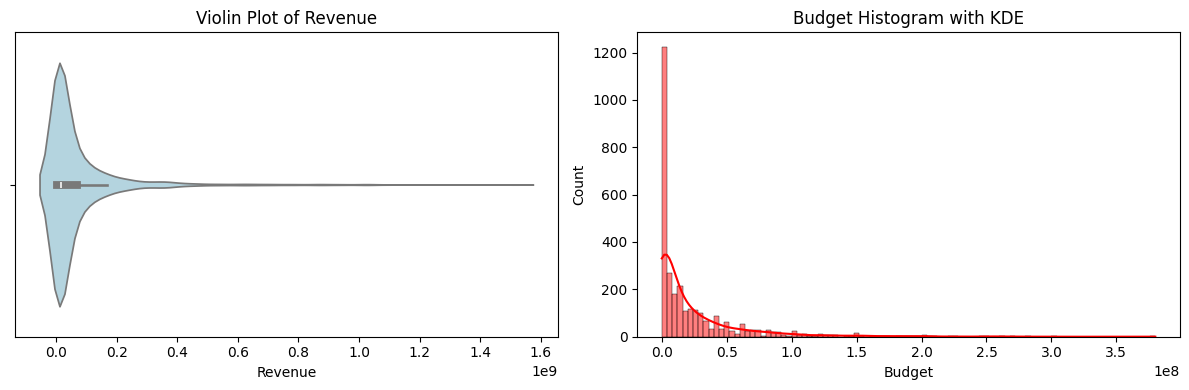

In [60]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Adjust the figure size as needed

# Plot 1: Violin plot for revenue
sns.violinplot(x=data['revenue'], color='lightblue', ax=axes[0])
axes[0].set_title('Violin Plot of Revenue')
axes[0].set_xlabel('Revenue')

# Plot 2: Histogram with KDE for budget
sns.histplot(x=data['budget'], kde=True, color='red', ax=axes[1])
axes[1].set_title('Budget Histogram with KDE')
axes[1].set_xlabel('Budget')

# Adjust layout
plt.tight_layout()
plt.show()


* There is cluster of budget and renenue on left hand side, there are numbers of movie have Outliers.
* Revenue , Budget have Outliers on right hand side.
* Those movies have specfic range of budgut have earn , equaly range of revenue.

In [61]:
# Calculate Q1 (25th percentile), Q2 (50th percentile or median), Q3 (75th percentile)
Q1 = np.percentile(data['revenue'], 25)
Q2 = np.percentile(data['revenue'], 50)  # or np.median(data)
Q3 = np.percentile(data['revenue'], 75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Output the results
print(f"Q1 (25th percentile of revenue): {Q1}")
print(f"Q2 (50th percentile of revenue , median): {Q2}")
print(f"Q3 (75th percentile of revenue): {Q3}")
print(f"IQR (Interquartile Range of revenue): {IQR}")

Q1 (25th percentile of revenue): 2379808.25
Q2 (50th percentile of revenue , median): 16807068.0
Q3 (75th percentile of revenue): 68919203.5
IQR (Interquartile Range of revenue): 66539395.25


### V) Plot's of Profit column

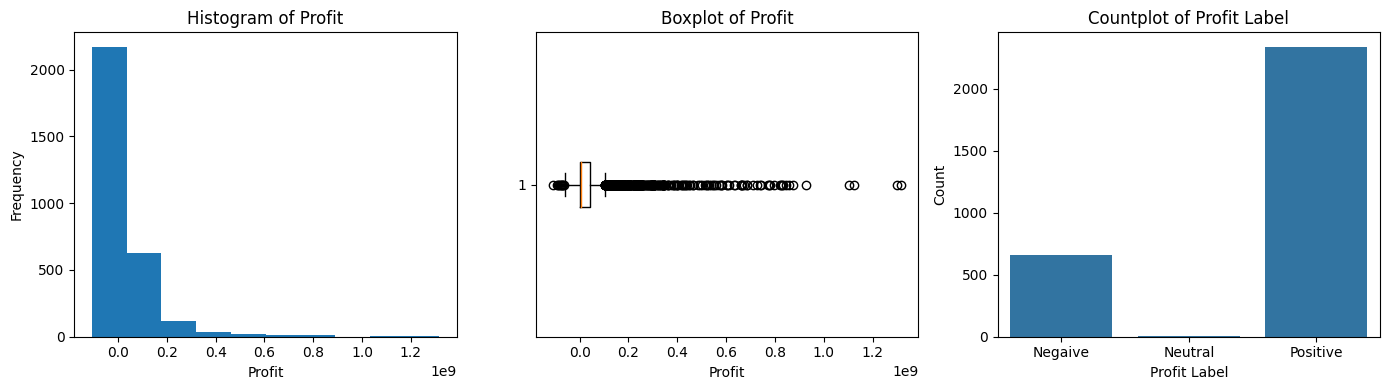

In [62]:
# Figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(14, 4))  # Adjust the figure size accordingly

# Plot 1: Histogram
gf = data['Profit']
axes[0].hist(gf)
axes[0].set_title('Histogram of Profit')
axes[0].set_xlabel('Profit')
axes[0].set_ylabel('Frequency')

# Plot 2: Boxplot
gf = data['Profit']
axes[1].boxplot(gf, vert=False)
axes[1].set_title('Boxplot of Profit')
axes[1].set_xlabel('Profit')

# Plot 3: Countplot
x = data['Profit_Label']
sns.countplot(x=x, ax=axes[2])
axes[2].set_title('Countplot of Profit Label')
axes[2].set_xlabel('Profit Label')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


In [63]:
data['Profit_Label'].value_counts()

,count
Profit_Label,
Positive,2337
Negaive,655
Neutral,8


### Insights:
* Profit is positive skewed also have outliers.
* higher frequesny on zero then , as move forward its redused.


In [64]:
# Calculate Q1 (25th percentile), Q2 (50th percentile or median), Q3 (75th percentile)
Q1 = np.percentile(data['Profit'], 25)
Q2 = np.percentile(data['Profit'], 50)  # or np.median(data)
Q3 = np.percentile(data['Profit'], 75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Output the results
print(f"Q1 (25th percentile of Profit): {Q1}")
print(f"Q2 (50th percentile of Profit, median): {Q2}")
print(f"Q3 (75th percentile of Profit): {Q3}")
print(f"IQR (Interquartile Range of Profit): {IQR}")

Q1 (25th percentile of Profit): 17952.0
Q2 (50th percentile of Profit, median): 6121122.5
Q3 (75th percentile of Profit): 41432926.0
IQR (Interquartile Range of Profit): 41414974.0


In [66]:
data.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'orig_lang', 'orig_title',
       'popularity', 'prod_comp', 'prod_count', 'release_date', 'runtime',
       'spoken_lang', 'status', 'title', 'cast', 'crew', 'revenue', 'Profit',
       'release_month', 'year', 'genres_list', 'Profit_Label'],
      dtype='object')



## Bivariate analysis
### I) What is the impect budget on Profit &  Profit on  Orignal_language  relation.

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=data , x = '')

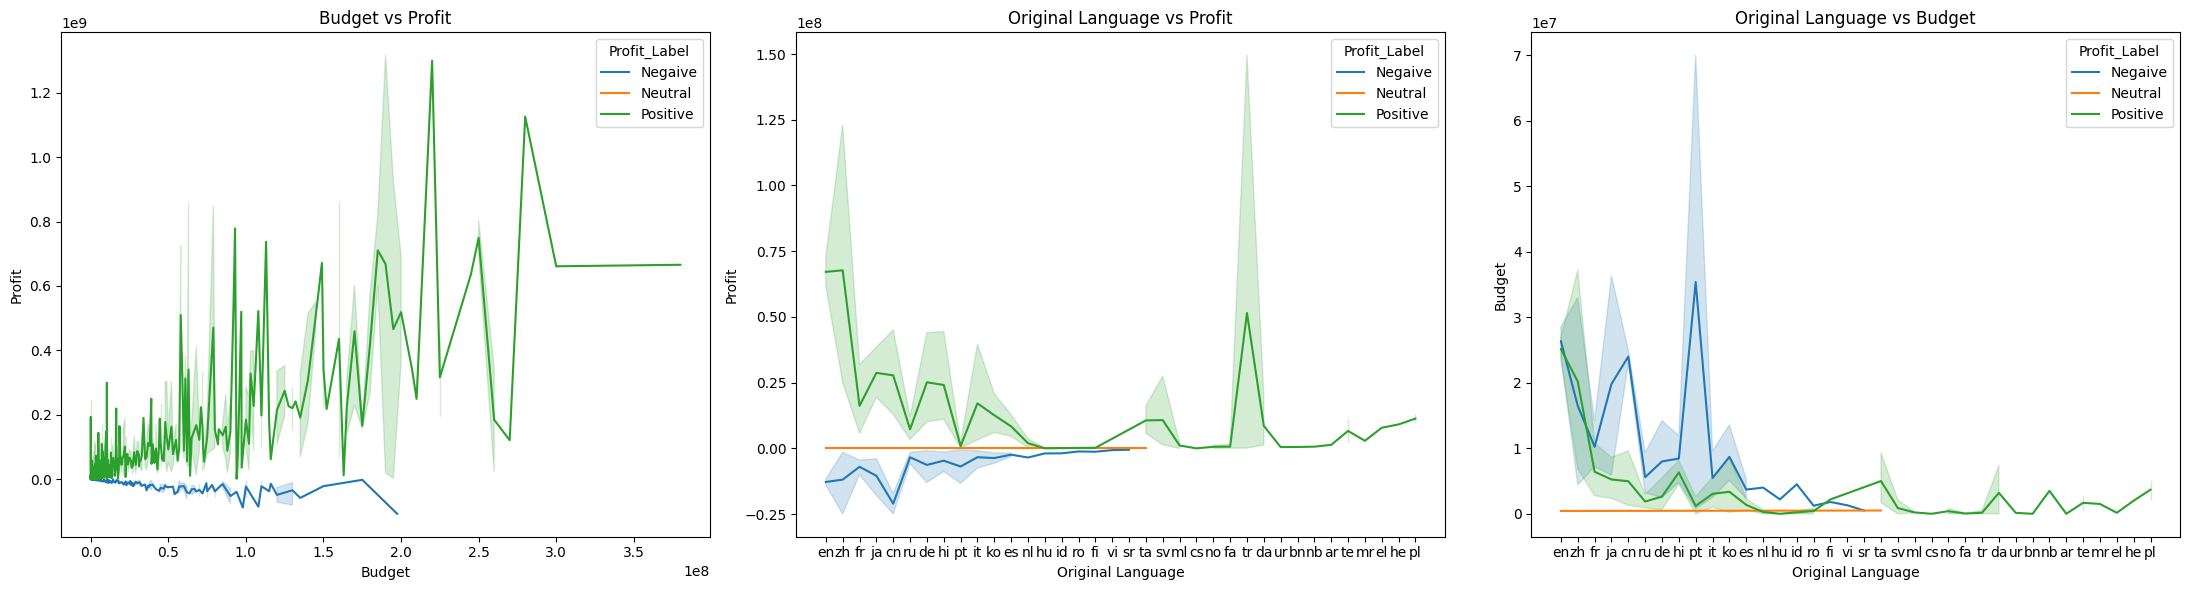

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# First plot: Budget vs Profit
sns.lineplot(data=data, x='budget', y='Profit', hue='Profit_Label', ax=axes[0])
axes[0].set_title('Budget vs Profit')
axes[0].set_xlabel('Budget')
axes[0].set_ylabel('Profit')

# Second plot: Original Language vs Profit
sns.lineplot(data=data, x='orig_lang', y='Profit', hue='Profit_Label', ax=axes[1])
axes[1].set_title('Original Language vs Profit')
axes[1].set_xlabel('Original Language')
axes[1].set_ylabel('Profit')

# Second plot: Original Language vs Profit
sns.lineplot(data=data, x='orig_lang', y='budget', hue='Profit_Label', ax=axes[2])
axes[2].set_title('Original Language vs Budget')
axes[2].set_xlabel('Original Language')
axes[2].set_ylabel('Budget')

# Adjust layout
plt.tight_layout()
plt.show()


### Insights:
* There is cluster of profit with a specific range of budget.
#### I) Negetive Profit summery:
* i) The movies have { 'Language': {en zh fr ja cn ru de hi pt it ko es nl hu id ro fi vi sr ta} } have high budget  , gives negetive profit.
* Note : en: english movies can earn positive profit if they have specfic range of budget.

#### II) Neutral movies summery
* i) Have budget around zero 0.0 they have propotional profit.
* ii) It was very good desizine to not take higher budget for them here , resion being the range of language like { 'Language': {en zh fr ja cn ru de hi pt it ko es nl hu id ro fi vi sr ta} } have not earn not profit after taking the higer budget can see in graph {Relation b/t Orignal_language v/s Budget}.
* Note: not valid for english language , we can take a litle bit high budget.

#### III) Positive Profit Summery
* Should take specfic range of budgut to get higher budget.
* Also depend upon language.
#### Like:
*  { hi : Hindi ,
ko : Korean ,
vi: Vietnamese ,
sr: Serbian ,
ta: Tamil ,
sv: Swedish ,
ml: Malayalam ,
fa: Persian (Farsi) ,
tr: Turkish ,
da: Danish,
mr: Marathi ,
el: Greek ,
he: Hebrew ,
pl: Polish } have low budgut and earn + positive profit.
* We can increse the budget for these language to get earn higher profit on box office.

### Note : Genre also effect in the earning of profit for movies.


<ipython-input-71-f633b1226fb8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_profit.values, y=genre_profit.index, palette="coolwarm")


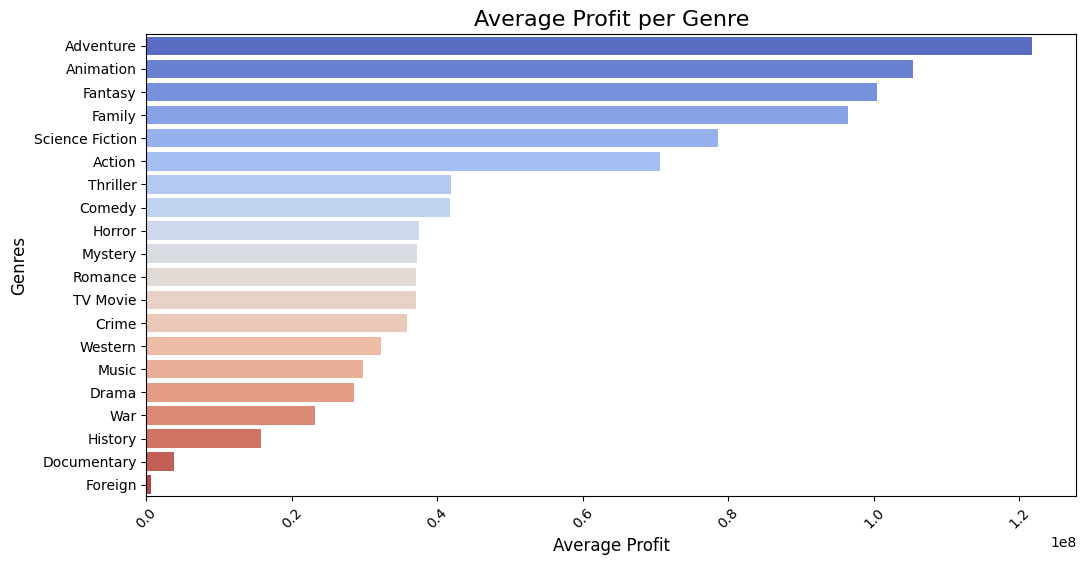

In [71]:
# Explode the genres_list so that each genre has its own row
data_exploded = data_with_genres.explode('genres_list')

# Group by genres and calculate the average profit for each genre
genre_profit = data_exploded.groupby('genres_list')['Profit'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12,6))
sns.barplot(x=genre_profit.values, y=genre_profit.index, palette="coolwarm")
plt.title('Average Profit per Genre', fontsize=16)
plt.xlabel('Average Profit', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.xticks(rotation=45)
plt.show()


#### Insights:
* Genre like { Adventure ,
Animation ,
Fantasy ,
Family ,
Science Fiction ,
Action ,
Thriller ,
Comedy ,
Horror ,
Mystery }   have also responsible for profit.
* Genre like { History ,
Documentary ,  
Foreign } are not give good range of profit.








## II) Effect of Popularity on Genres.

<ipython-input-73-acb06a50850c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette="coolwarm")


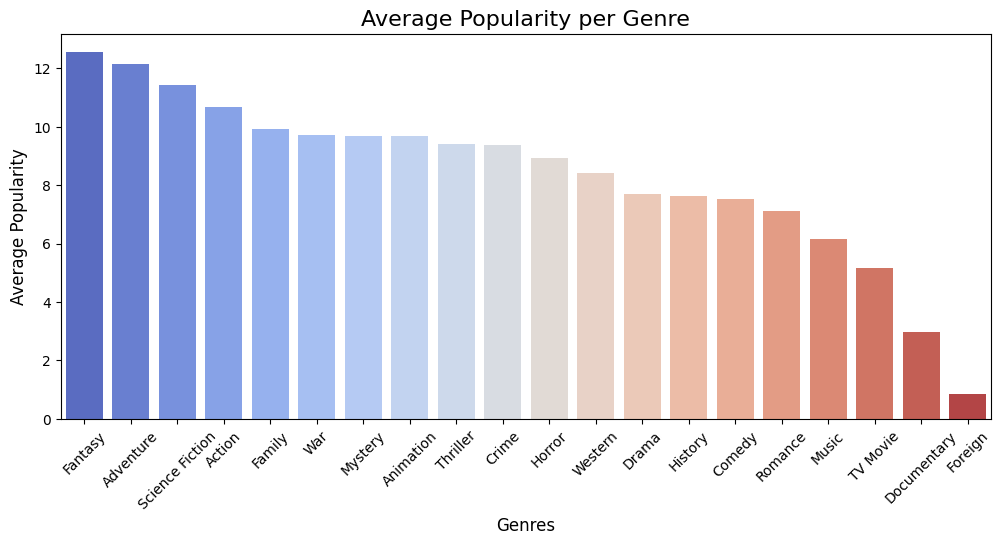

In [73]:
# Explode the genres_list so that each genre has its own row
data_exploded = data_with_genres.explode('genres_list')

# Group by genres and calculate the average popularity for each genre
genre_popularity = data_exploded.groupby('genres_list')['popularity'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12,5))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette="coolwarm")
plt.title('Average Popularity per Genre', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.show()


#### Insights:
* Highly populer Genre :{ Fantasy ,
Adventure ,
Science Fiction ,
Family ,
War ,
Mystery ,
Animation ,
Thriller ,
Crime }

* Low populer Genres : { TV Movie ,
Documentary ,  Foreign } have low popularity

## III) Pairplot of imdb data

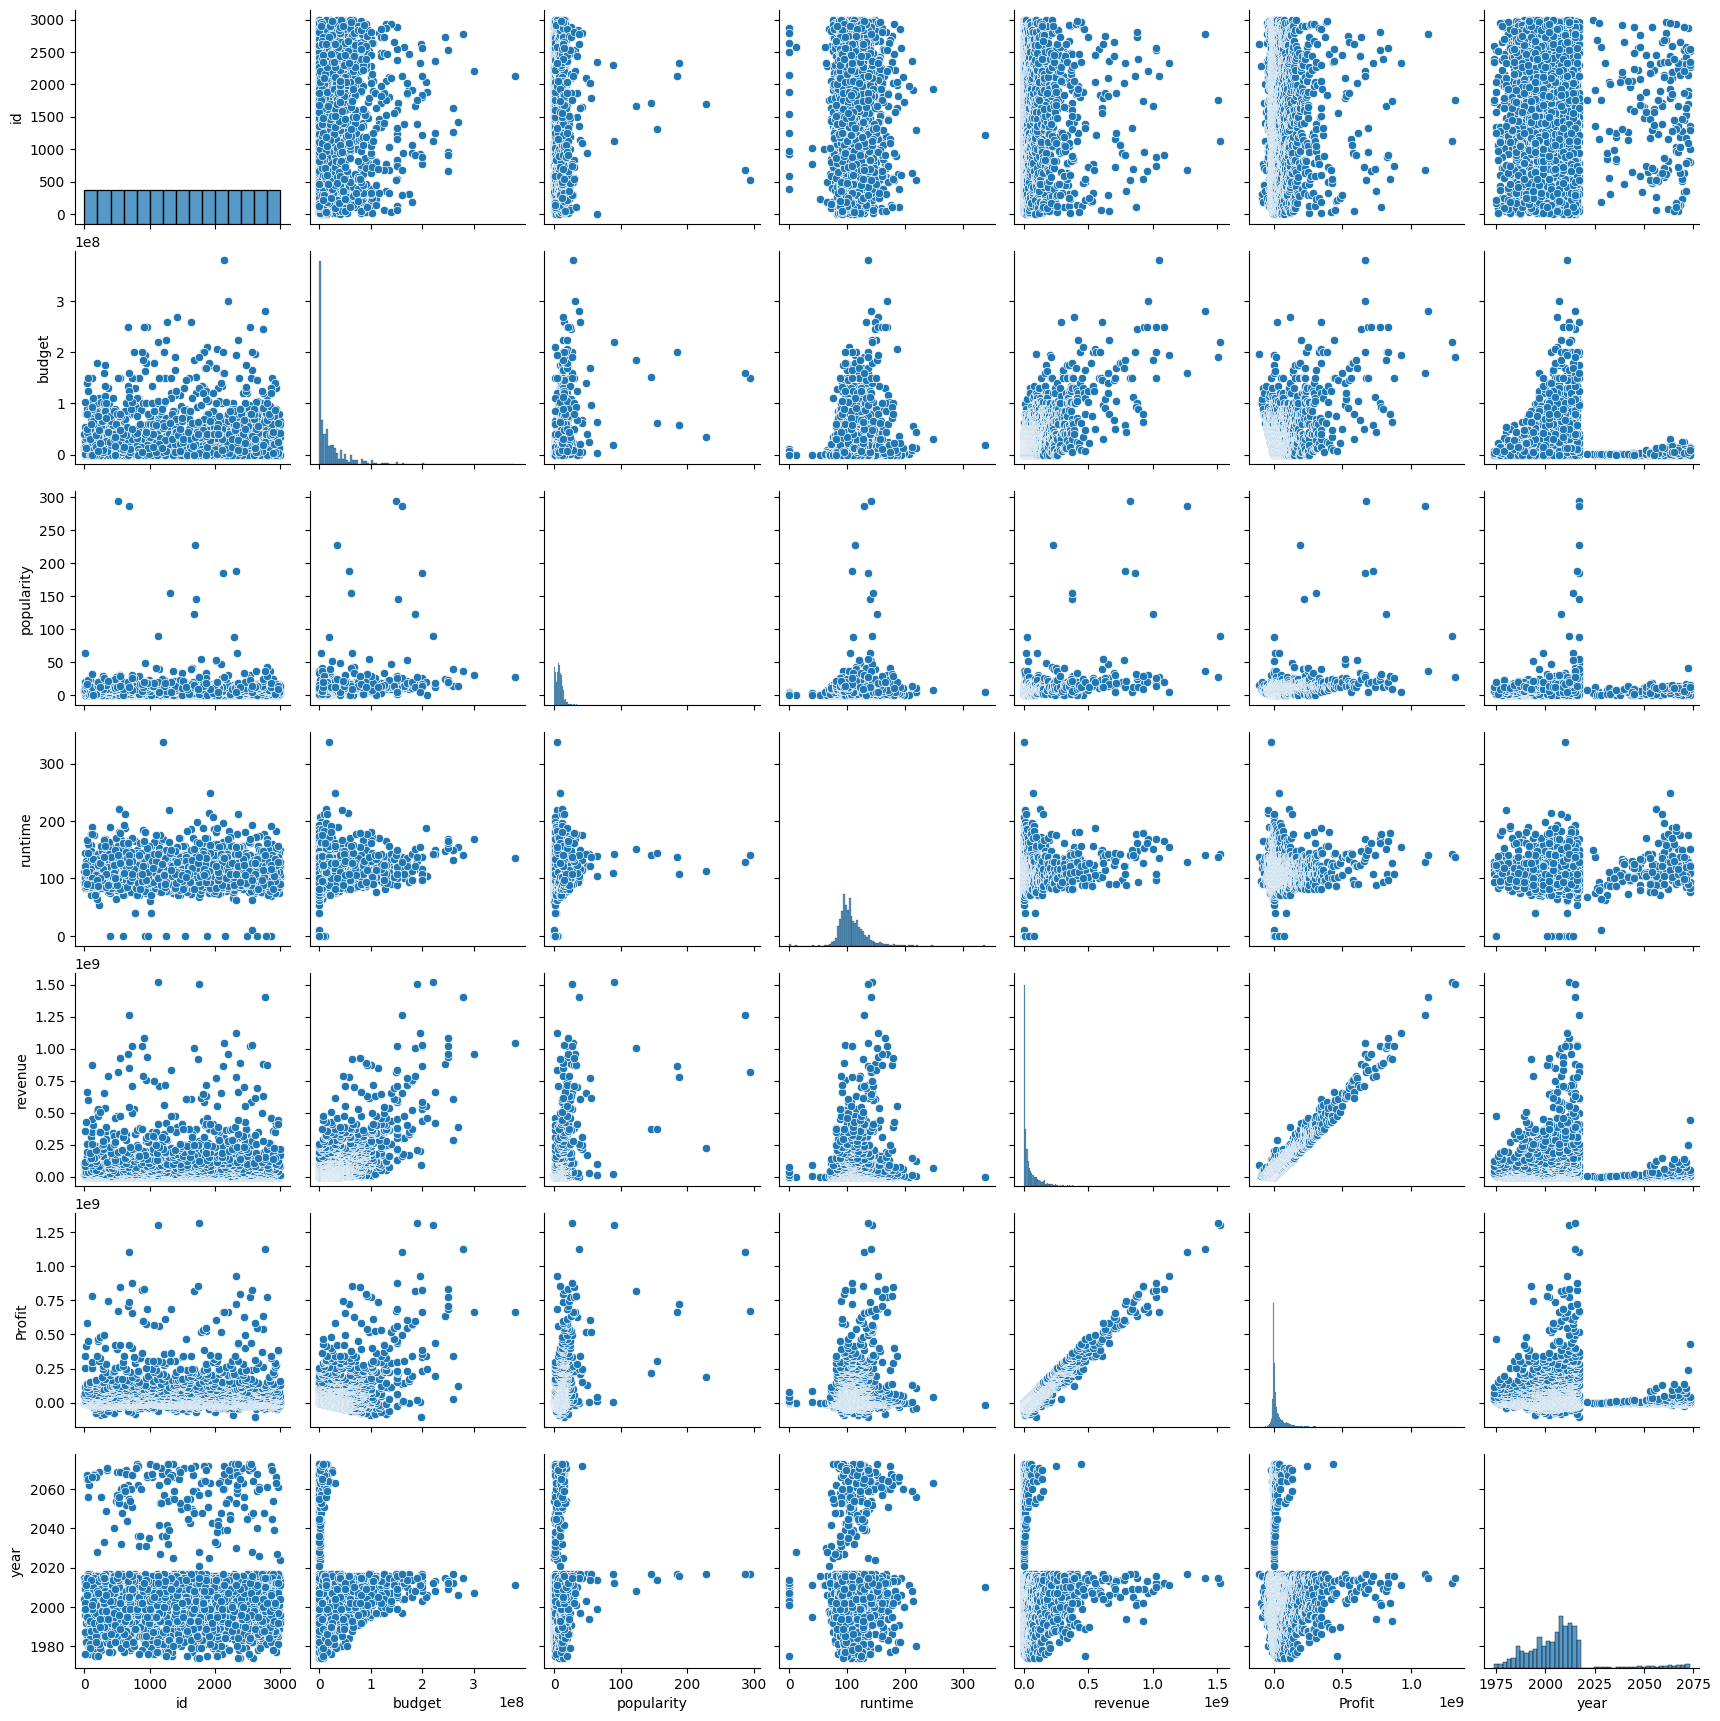

In [74]:
sns.pairplot(data)

## IV) Coration between Numerical columns.

In [75]:
num_data = data.select_dtypes(include=(['int64', 'float64']))
num_data.corr()

,id,budget,popularity,runtime,revenue,Profit
id,1.000000,0.019732,-0.007470,0.010705,0.000610,-0.005758
budget,0.019732,1.000000,0.342356,0.238410,0.752965,0.592294
popularity,-0.007470,0.342356,1.000000,0.133748,0.461460,0.452157
runtime,0.010705,0.238410,0.133748,1.000000,0.216417,0.186393
revenue,0.000610,0.752965,0.461460,0.216417,1.000000,0.976191
Profit,-0.005758,0.592294,0.452157,0.186393,0.976191,1.000000


<Axes: >

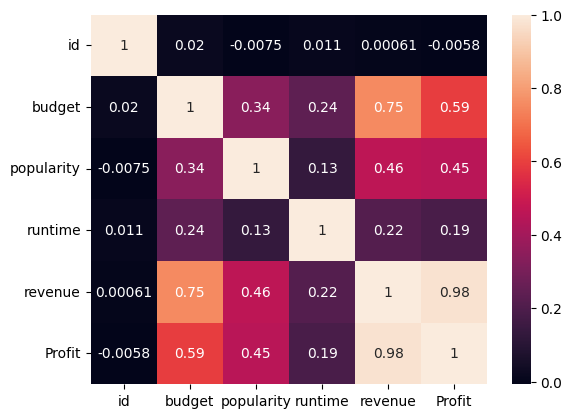

In [76]:
sns.heatmap(num_data.corr(), annot = True)

#### Insights:
* Value Range: Correlation range from -1 to 1.
* 1: Perfect positive correlation (as one variable increases, the other increases).
* -1: Perfect negative correlation (as one variable increases, the other decreases).
* 0: No correlation (no relationship between the variables)

### Top10 higest revenue genrated movies.

In [77]:
top10populer=data.nlargest(10,'popularity')[['title','cast','crew','budget','Profit']].set_index('title')
top10populer

,cast,crew,budget,Profit
title,,,,
Wonder Woman,no cast,no crew,149000000,671580447
Beauty and the Beast,"[{'cast_id': 174, 'character': 'Belle', 'credi...","[{'credit_id': '551879bec3a3681f840004eb', 'de...",160000000,1102886337
Baby Driver,"[{'cast_id': 9, 'character': 'Baby', 'credit_i...","[{'credit_id': '55c58c009251417a21000e5d', 'de...",34000000,190511319
Deadpool,"[{'cast_id': 99, 'character': 'Wade Wilson / D...","[{'credit_id': '57e564fac3a3681beb0000cc', 'de...",58000000,725112979
Guardians of the Galaxy Vol. 2,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de...",200000000,663416141
Gone Girl,"[{'cast_id': 7, 'character': 'Nick Dunne', 'cr...","[{'credit_id': '52fe4d7fc3a368484e1ec741', 'de...",61000000,308330363
War for the Planet of the Apes,"[{'cast_id': 6, 'character': 'Caesar', 'credit...","[{'credit_id': '591f036fc3a368774e036079', 'de...",152000000,217907963
The Dark Knight,"[{'cast_id': 35, 'character': 'Bruce Wayne / B...","[{'credit_id': '55a0eb4a925141296b0010f8', 'de...",185000000,819558444
The Avengers,"[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",220000000,1299557910


### Top 10 **movies**

<ipython-input-78-1520f507bac8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='Profit', data=top10populer , palette= 'husl')


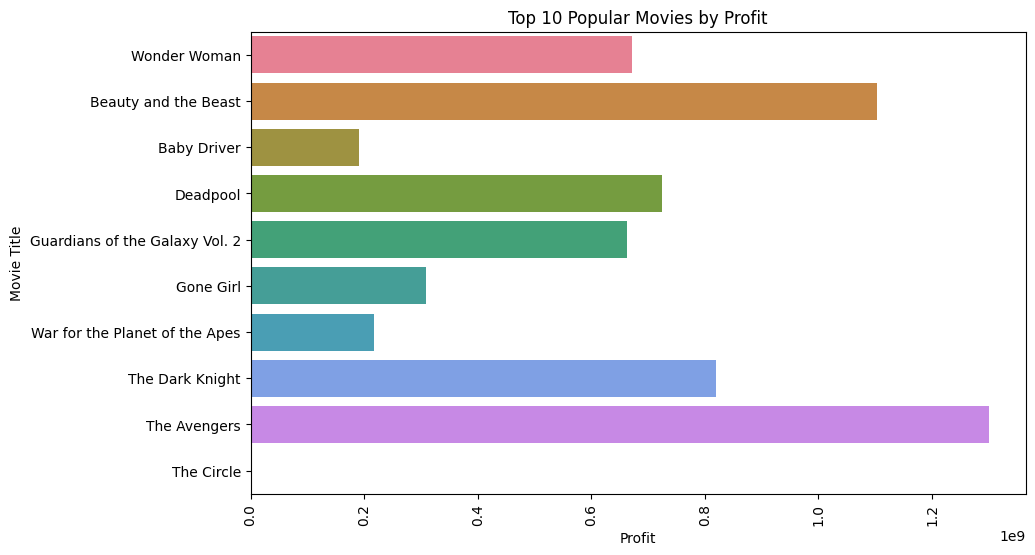

In [78]:
# Reset the index to bring the 'title' back as a column for plotting
top10populer = top10populer.reset_index()

# Plotting Profit vs Title
plt.figure(figsize=(10, 6))
sns.barplot(y='title', x='Profit', data=top10populer , palette= 'husl')
plt.xticks(rotation=90)
plt.title('Top 10 Popular Movies by Profit')
plt.ylabel('Movie Title')
plt.xlabel('Profit')
plt.show()

* The Avengers is the higest profit earning movie

## Insights:
### Profit earning depend upon verious factors like Genre , budget , language , popularity etc.....